In [1]:
import scanpy as sc
from anndata import AnnData
import numpy as np
# import requires setting a PYTHONPATH with the data_import directory
import h5ad_preparation as prep
import pandas as pd

20230111-082128.444 10826 INFO root:17 local study files stored in: /home/mahmoud_ibrahim/code/cellenium/scratch


In [2]:
url = "https://figshare.com/ndownloader/files/23872838"
adata = prep.get_h5ad_from_url(url, "tabula_muris_senis_heart")

/home/mahmoud_ibrahim/.local/lib/python3.8/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/home/mahmoud_ibrahim/.local/lib/python3.8/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [3]:
prep.jupyter_h5ad_overview(adata)

,FACS.selection,age,cell,cell_ontology_class,cell_ontology_id,free_annotation,method,mouse.id,sex,subtissue,tissue,n_genes,n_counts,louvain,leiden
index,,,,,,,,,,,,,,,
A10_B001361_B007505_S10.mm10-plus-0-0,Viable,18m,A10_B001361,B cell,nan,B cell,facs,18_46_F,female,RV,Heart,1237,6587.0,10,10
A11_B001361_B007505_S11.mm10-plus-0-0,Viable,18m,A11_B001361,B cell,nan,B cell,facs,18_46_F,female,RV,Heart,1257,8397.0,10,10
A12_B001361_B007505_S12.mm10-plus-0-0,Viable,18m,A12_B001361,B cell,nan,B cell,facs,18_46_F,female,RV,Heart,1435,21892.0,10,15
A13_B001361_B007505_S13.mm10-plus-0-0,Viable,18m,A13_B001361,fibroblast of cardiac tissue,nan,fibroblast of cardiac tissue,facs,18_46_F,female,RV,Heart,3716,526751.0,3,9
A14_B001361_B007505_S14.mm10-plus-0-0,Viable,18m,A14_B001361,B cell,nan,B cell,facs,18_46_F,female,RV,Heart,1331,12044.0,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9.MAA000587.3_8_M.1.1-1-1,nan,3m,P9.MAA000587.3_8_M.1.1,endothelial cell of coronary artery,CL:0000115,coronary vascular endothelial cell,facs,3_8_M,male,LV,Heart,1878,202845.0,5,8
P9.MAA000589.3_9_M.1.1-1-1,nan,3m,P9.MAA000589.3_9_M.1.1,endothelial cell of coronary artery,CL:0000115,coronary vascular endothelial cell,facs,3_9_M,male,LV,Heart,1402,77401.0,2,7
P9.MAA000898.3_11_M.1.1-1-1,nan,3m,P9.MAA000898.3_11_M.1.1,endothelial cell of coronary artery,nan,coronary vascular endothelial cell,facs,3_11_M,male,RV,Heart,1171,8355.0,2,2


,n_cells,means,dispersions,dispersions_norm,highly_variable
index,,,,,
0610005C13Rik,3939,0.005745,1.430076,0.161429,False
0610007C21Rik,61891,1.142787,2.380935,-0.419237,False
0610007L01Rik,36115,0.388616,1.887040,-0.481862,False
0610007N19Rik,19591,0.246272,0.875061,-0.141954,False
0610007P08Rik,12581,0.119343,1.661517,0.287940,False
...,...,...,...,...,...
Zyg11a,276,0.001093,1.313884,0.097916,False
Zyg11b,23165,0.183362,1.828559,0.379248,False
Zyx,58021,1.137699,2.542194,-0.251419,False


(9669, 22966)

<9669x22966 sparse matrix of type '<class 'numpy.float32'>'
	with 23579241 stored elements in Compressed Sparse Row format>

(9669, 22966)

OverloadedDict, wrapping:
	{'age_colors': array(['#e1f3b2', '#97d6b9', '#1f80b8'], dtype=object), 'cell_ontology_class_colors': array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78'],
      dtype=object), 'leiden': {'params': {'n_iterations': array([-1]), 'random_state': array([0]), 'resolution': array([1])}}, 'louvain': {'params': {'random_state': array([0])}}, 'neighbors': {'params': {'method': array(['umap'], dtype=object), 'metric': array(['euclidean'], dtype=object), 'n_neighbors': array([15]), 'n_pcs': array([5])}}, 'pca': {'variance': array([89.53235  , 66.56099  , 49.238113 , 33.33724  , 29.774006 ,
       24.685858 , 18.530642 , 17.510866 , 14.928634 , 13.362649 ,
       11.656936 , 10.016225 ,  8.841875 ,  8.372605 ,  7.8514824,
        7.6534266,  6.878924 ,  6.409394 ,  6.112996 ,  5.831008 ,
        5.686256 ,  5.303363 ,  5.2382274,  5.0888405,  4.875264 ,
        4.6514654,  4.4857097,  4.415

20230111-082136.026 10826 INFO root:118 make_norm_expression: no transformations necessary


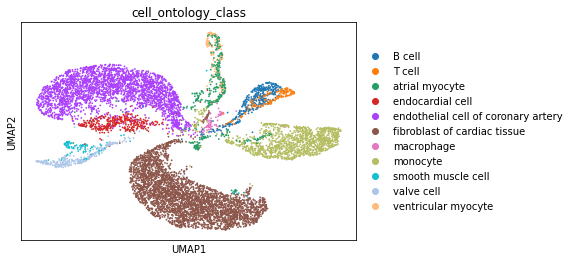

In [4]:
prep.remove_raw_and_layers(adata)
prep.make_sparse(adata)
prep.filter_outliers(adata)
prep.make_norm_expression(adata)

prep.add_umap(adata)
sc.pl.umap(adata, color='cell_ontology_class')

In [5]:
prep.calculate_differentially_expressed_genes(adata, ['cell_ontology_class','free_annotation','louvain','leiden'])

diff.exp. genes:  75%|███████▌  | 3/4 [01:02<00:21, 21.10s/it]/home/mahmoud_ibrahim/.local/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/mahmoud_ibrahim/.local/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/mahmoud_ibrahim/.local/lib/python3.8/site-packages/scanpy

,names,scores,logfoldchanges,pvals,pvals_adj,ref_attr_value,cmp_attr_value,attribute_name
0,Gsn,81.066284,4.959721,0.000000e+00,0.000000,fibroblast of cardiac tissue,_OTHERS_,cell_ontology_class
1,Dcn,81.001816,5.474919,0.000000e+00,0.000000,fibroblast of cardiac tissue,_OTHERS_,cell_ontology_class
2,Dpt,80.210602,6.893742,0.000000e+00,0.000000,fibroblast of cardiac tissue,_OTHERS_,cell_ontology_class
3,Serping1,79.719368,5.249381,0.000000e+00,0.000000,fibroblast of cardiac tissue,_OTHERS_,cell_ontology_class
4,Fbln1,78.704208,6.717234,0.000000e+00,0.000000,fibroblast of cardiac tissue,_OTHERS_,cell_ontology_class
...,...,...,...,...,...,...,...,...
6029,Cotl1,4.931816,2.260409,8.146888e-07,0.000175,21,_OTHERS_,leiden
6030,Dpysl3,4.928176,2.504359,8.300072e-07,0.000177,21,_OTHERS_,leiden
6031,Cyth4,4.916789,2.417874,8.797520e-07,0.000185,21,_OTHERS_,leiden
6032,Irak1,4.903407,2.174121,9.418881e-07,0.000196,21,_OTHERS_,leiden


# final h5ad file

In [6]:
prep.set_cellenium_metadata(
    adata,
    title='Tabula Muris Senis Heart',
    description='Mouse Heart dataset from the Tabula Muris Senis Consortium',
    taxonomy_id=10090,
    ncit_tissue_ids=['C12727'],
    mesh_disease_ids=[],
    X_pseudolayer_name='norm_log_expression',
    main_sample_attributes=['cell_ontology_class', 'free_annotation']
)   

In [7]:
adata.write(prep.basedir.joinpath("tabula_muris_senis_heart.h5ad"))
prep.jupyter_h5ad_overview(adata)

,FACS.selection,age,cell,cell_ontology_class,cell_ontology_id,free_annotation,method,mouse.id,sex,subtissue,tissue,n_genes,n_counts,louvain,leiden
index,,,,,,,,,,,,,,,
A10_B001361_B007505_S10.mm10-plus-0-0,Viable,18m,A10_B001361,B cell,nan,B cell,facs,18_46_F,female,RV,Heart,1237,6587.0,10,10
A11_B001361_B007505_S11.mm10-plus-0-0,Viable,18m,A11_B001361,B cell,nan,B cell,facs,18_46_F,female,RV,Heart,1257,8397.0,10,10
A12_B001361_B007505_S12.mm10-plus-0-0,Viable,18m,A12_B001361,B cell,nan,B cell,facs,18_46_F,female,RV,Heart,1435,21892.0,10,15
A13_B001361_B007505_S13.mm10-plus-0-0,Viable,18m,A13_B001361,fibroblast of cardiac tissue,nan,fibroblast of cardiac tissue,facs,18_46_F,female,RV,Heart,3716,526751.0,3,9
A14_B001361_B007505_S14.mm10-plus-0-0,Viable,18m,A14_B001361,B cell,nan,B cell,facs,18_46_F,female,RV,Heart,1331,12044.0,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9.MAA000587.3_8_M.1.1-1-1,nan,3m,P9.MAA000587.3_8_M.1.1,endothelial cell of coronary artery,CL:0000115,coronary vascular endothelial cell,facs,3_8_M,male,LV,Heart,1878,202845.0,5,8
P9.MAA000589.3_9_M.1.1-1-1,nan,3m,P9.MAA000589.3_9_M.1.1,endothelial cell of coronary artery,CL:0000115,coronary vascular endothelial cell,facs,3_9_M,male,LV,Heart,1402,77401.0,2,7
P9.MAA000898.3_11_M.1.1-1-1,nan,3m,P9.MAA000898.3_11_M.1.1,endothelial cell of coronary artery,nan,coronary vascular endothelial cell,facs,3_11_M,male,RV,Heart,1171,8355.0,2,2


,n_cells,means,dispersions,dispersions_norm,highly_variable
index,,,,,
0610005C13Rik,71,0.005745,1.430076,0.161429,False
0610007C21Rik,5566,1.142787,2.380935,-0.419237,False
0610007L01Rik,2636,0.388616,1.887040,-0.481862,False
0610007N19Rik,2802,0.246272,0.875061,-0.141954,False
0610007P08Rik,962,0.119343,1.661517,0.287940,False
...,...,...,...,...,...
Zyg11a,12,0.001093,1.313884,0.097916,False
Zyg11b,1633,0.183362,1.828559,0.379248,False
Zyx,5720,1.137699,2.542194,-0.251419,False


(9669, 20650)

<9669x20650 sparse matrix of type '<class 'numpy.float32'>'
	with 23576674 stored elements in Compressed Sparse Row format>

OverloadedDict, wrapping:
	{'age_colors': array(['#e1f3b2', '#97d6b9', '#1f80b8'], dtype=object), 'cell_ontology_class_colors': array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78'],
      dtype=object), 'leiden': {'params': {'n_iterations': array([-1]), 'random_state': array([0]), 'resolution': array([1])}}, 'louvain': {'params': {'random_state': array([0])}}, 'neighbors': {'params': {'method': array(['umap'], dtype=object), 'metric': array(['euclidean'], dtype=object), 'n_neighbors': array([15]), 'n_pcs': array([5])}}, 'pca': {'variance': array([89.53235  , 66.56099  , 49.238113 , 33.33724  , 29.774006 ,
       24.685858 , 18.530642 , 17.510866 , 14.928634 , 13.362649 ,
       11.656936 , 10.016225 ,  8.841875 ,  8.372605 ,  7.8514824,
        7.6534266,  6.878924 ,  6.409394 ,  6.112996 ,  5.831008 ,
        5.686256 ,  5.303363 ,  5.2382274,  5.0888405,  4.875264 ,
        4.6514654,  4.4857097,  4.415